Delta: -0.002282402543563493
Gamma: 5.977005242887422e-07
Theta: -226.6618023019218
Vega: 37.565876558656704
Rho: -40.75151575277722


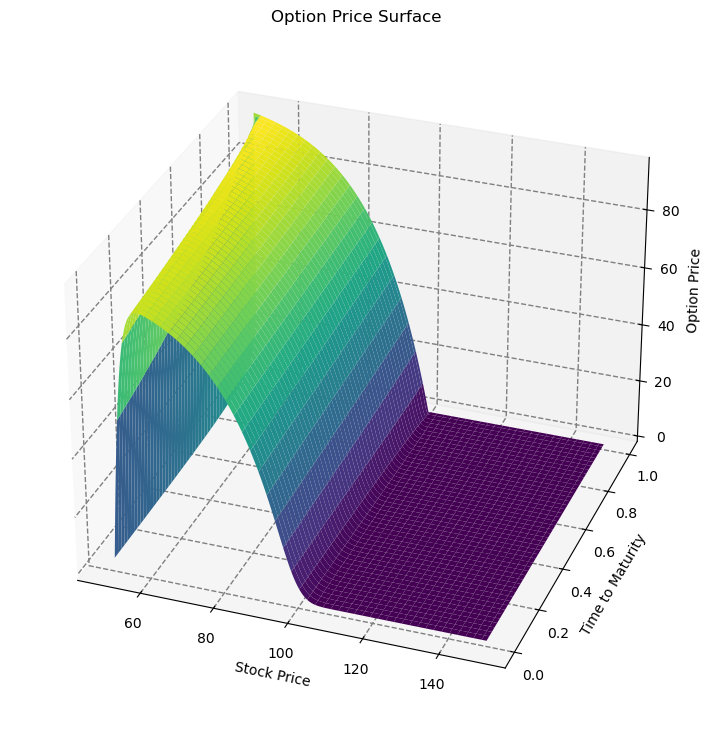

In [1]:
import libfinite_differences_options_rs as finite_differences_options_rs
import numpy as np
import matplotlib.pyplot as plt

# Define the option parameters
# s0: Initial stock price
# k: Strike price
# r: Risk-free rate
# sigma: Volatility
# t: Time to maturity
# n: Number of time steps
# m: Number of stock price steps
s0 = 100.0
k = 100.0
r = 0.05
sigma = 0.2
t = 1.0
n = 1000
m = 1000

# Call the crank_nicolson function to compute the option price grid
# This will return a 2D numpy array with option prices at different stock prices and times
option_grid = finite_differences_options_rs.crank_nicolson(s0, k, r, sigma, t, n, m)

# Calculate the Greeks (delta, gamma, theta, vega, and rho) for the option
delta, gamma, theta, vega, rho = finite_differences_options_rs.calculate_greeks(s0, k, r, sigma, t, n, m)

# Print the calculated Greeks
print(f"Delta: {delta}")
print(f"Gamma: {gamma}")
print(f"Theta: {theta}")
print(f"Vega: {vega}")
print(f"Rho: {rho}")

# Plotting the option price surface
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for stock prices and time
# The stock prices range from 50 to 150 (adjust range as needed)
# The times range from 0 to 1 (adjust range as needed)
stock_prices = np.linspace(50, 150, option_grid.shape[1])
times = np.linspace(0, 1, option_grid.shape[0])
X, Y = np.meshgrid(stock_prices, times)

# Enable and customize the grid lines for each axis
ax.xaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=1)
ax.yaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=1)
ax.zaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=1)

# Plot the surface with stock prices on the X-axis, time on the Y-axis, and option price on the Z-axis
ax.plot_surface(X, Y, option_grid, cmap='viridis')

# Rotate the plot 15 degrees to the right (azimuthal angle)
ax.view_init(elev=30, azim=290)

# Set the labels and title for the plot
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Option Price')
ax.set_title('Option Price Surface')

# Show the plot
plt.show()
